# Simple Linear Regression. Minimal Example

### Import the relavant libraries

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D # Nice 3D graphs

### Generate random input dara to train on

In [8]:
observations = 1000
# np.random.uniform(low, high, size) draws a random value from the interval (low,high), where each number has an equal chnace to be selected
x = np.random.uniform(-10,10, (observations,1))
z = np.random.uniform(-10,10, (observations,1))

inputs = np.column_stack((x,z)) # np.column_stack() takes a sequence of 1D arrays and stacks them into a single 2D array

inputs.shape

(1000, 2)

### Create the targets we will aim at

In [9]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*x - 3*z + 5 + noise

targets.shape

(1000, 1)

### Plot teh training data

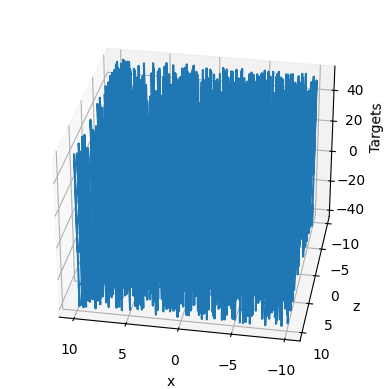

In [10]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, z, targets)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,)

### Initialize variables

In [11]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range,(2,1))
biases = np.random.uniform(-init_range, init_range,1)

print(weights)
print(biases)

[[-0.07999345]
 [-0.03052588]]
[-0.04726251]


### Set the learning rate

In [12]:
learning_rate = 0.02

### Train the model

### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.